In [20]:
import pandas as pd
import numpy as np
import plotly.express as px

In [21]:
url = 'https://raw.githubusercontent.com/fulekset/voila-dashboard/7724c3de7aba93bb2bff03c9c06bb3579d95c390/F-615904_Bosch_indexy.csv'
df = pd.read_csv(url,sep=";")
df["Value"]=df["Value"].str.replace(",",".").astype(float)
df["UpperLimit"]=df["UpperLimit"].str.replace(",",".").astype(float)
df["Index"]=df["Dmc"].str[10:11]
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour
df['Date_Hour'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:00')

In [22]:
# df=pd.read_csv(r"C:\Users\fulekset\Desktop\INDEXY_BOSCH\F-615904_Bosch_indexy.csv", sep=";")
# df["Value"]=df["Value"].str.replace(",",".").astype(float)
# df["UpperLimit"]=df["UpperLimit"].str.replace(",",".").astype(float)
# df["Index"]=df["Dmc"].str[10:11]
# df["Timestamp"]=pd.to_datetime(df["Timestamp"])
# df["Hour"] = df["Timestamp"].dt.hour
# df['Date_Hour'] = df['Timestamp'].dt.strftime('%Y-%m-%d %H:00')

In [23]:
parameter_list=df["Feature"].unique()

### Rozdelenie podľa INDEXOV - BOSCH

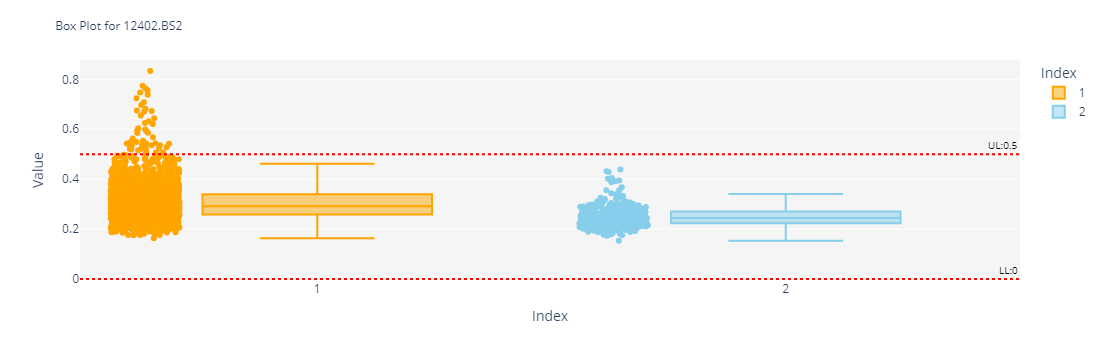

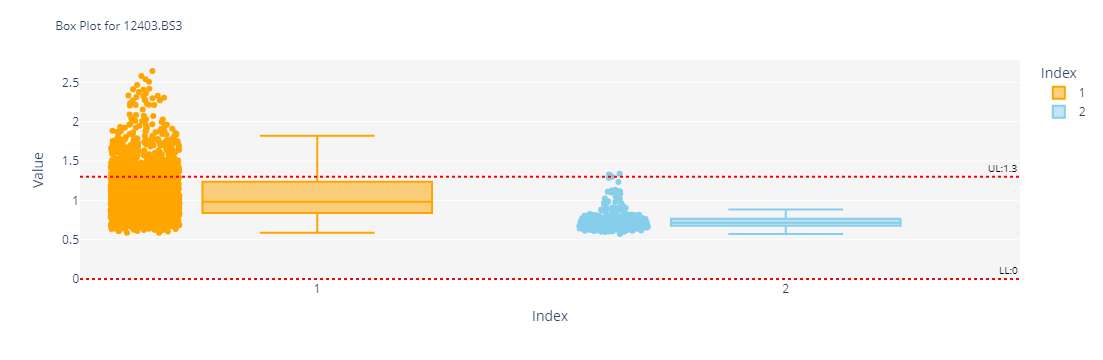

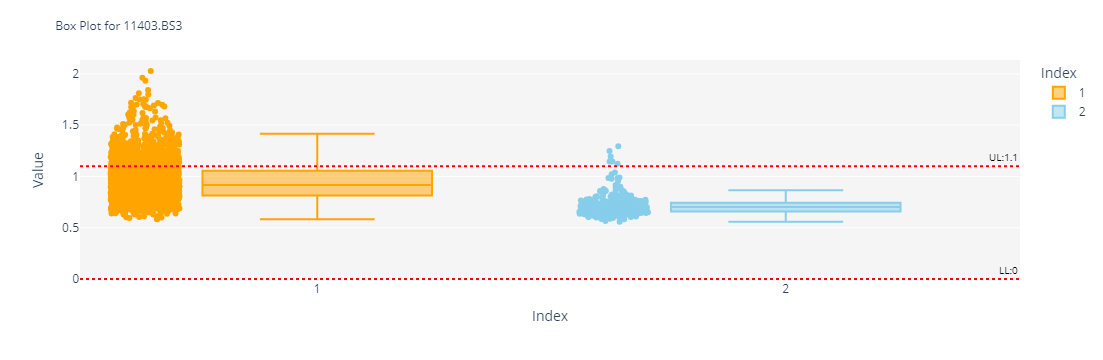

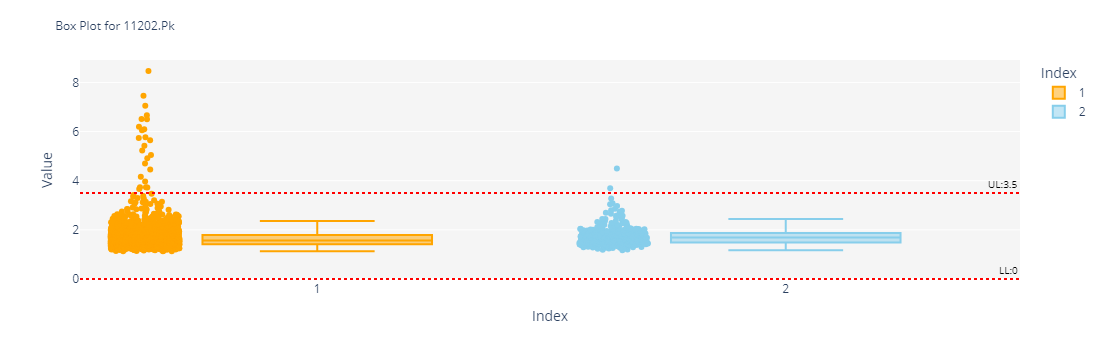

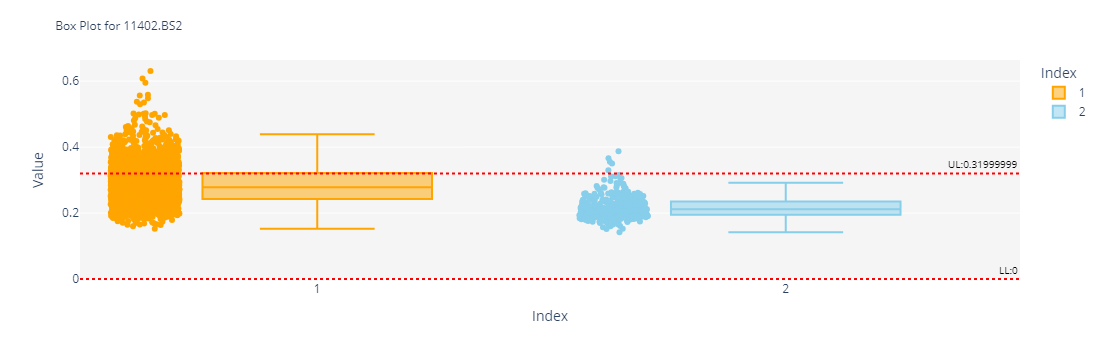

In [24]:
for param in parameter_list:
    UL=df[df["Feature"]==param]["UpperLimit"].iloc[0]
    LL=df[df["Feature"]==param]["LowerLimit"].iloc[0]
    fig=px.box(df[df["Feature"]==param], x="Index", y="Value", points="all", color="Index", color_discrete_map={"1":"orange","2":"skyblue"})
    fig.add_hline(y=UL, line_dash="dot", line_color="red", annotation_text=f'UL:{UL}',annotation_font=dict(size=10, color='black')) #pridanie tolerancie do grafu
    fig.add_hline(y=LL, line_dash="dot", line_color="red", annotation_text=f'LL:{LL}',annotation_font=dict(size=10, color='black'))
    fig.update_layout(title=f"Box Plot for {param}", title_font_size=12)
    fig.update_traces(marker=dict(size=4,line=dict(width=0.5,color='palegreen')),selector=dict(mode='markers'))
    fig.update_layout(plot_bgcolor='whitesmoke')
    fig.show()

### Rozdelenie podľa HODINY a INDEXU - BOSCH

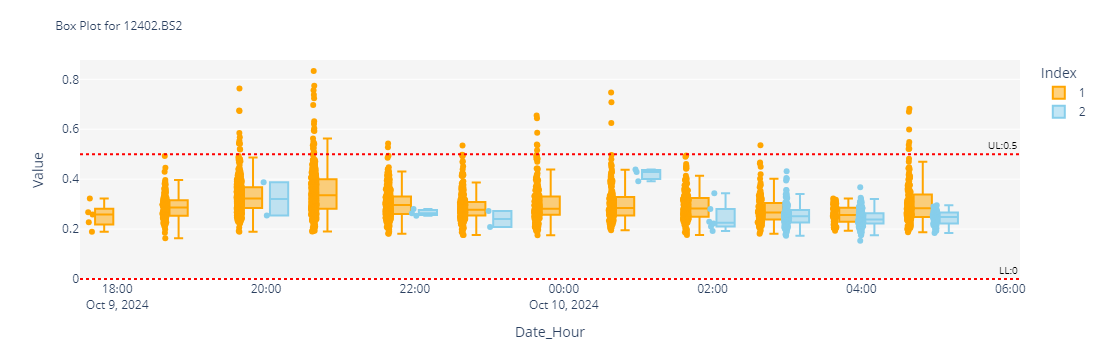

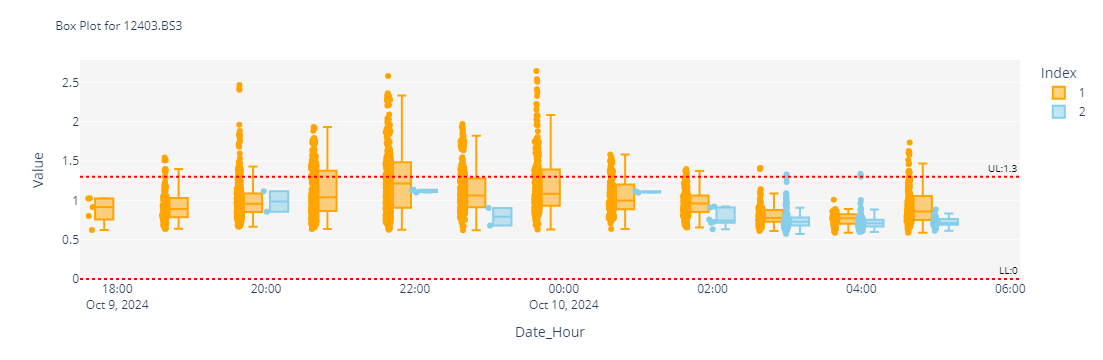

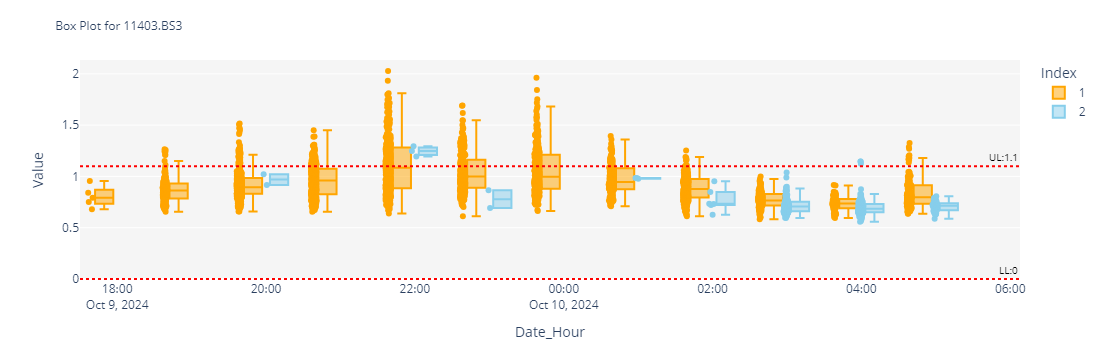

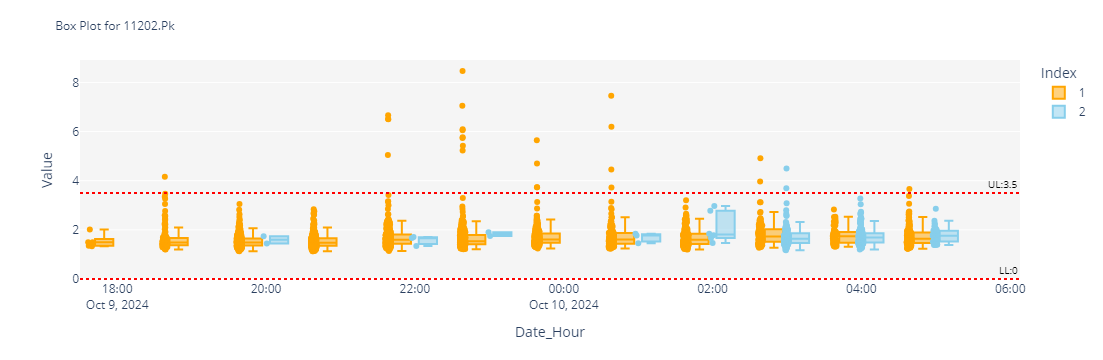

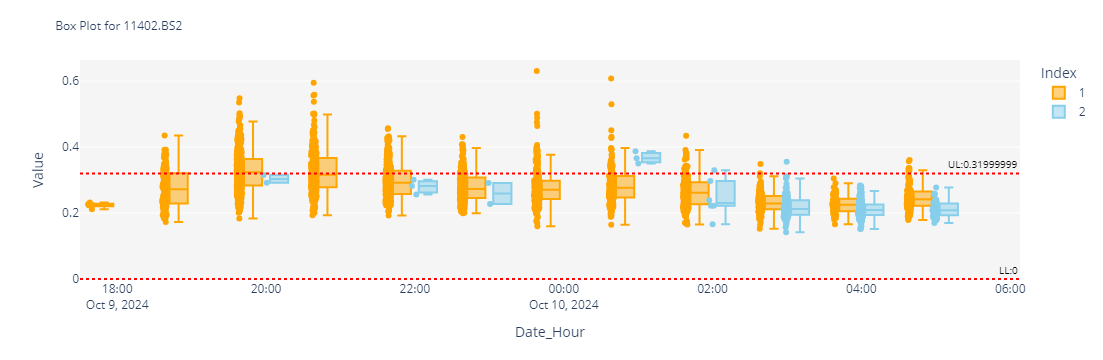

In [25]:
for param in parameter_list:
    UL=df[df["Feature"]==param]["UpperLimit"].iloc[0]
    LL=df[df["Feature"]==param]["LowerLimit"].iloc[0]
    fig=px.box(df[df["Feature"]==param], x="Date_Hour", y="Value", points="all", color="Index", color_discrete_map={"1":"orange","2":"skyblue"})
    fig.add_hline(y=UL, line_dash="dot", line_color="red", annotation_text=f'UL:{UL}',annotation_font=dict(size=10, color='black')) #pridanie tolerancie do grafu
    fig.add_hline(y=LL, line_dash="dot", line_color="red", annotation_text=f'LL:{LL}',annotation_font=dict(size=10, color='black'))
    fig.update_layout(title=f"Box Plot for {param}", title_font_size=12)
    fig.update_traces(marker=dict(size=4,line=dict(width=0.5,color='palegreen')),selector=dict(mode='markers'))
    fig.update_layout(plot_bgcolor='whitesmoke')
    fig.show()